In [2]:
# Load results
import pandas as pd

EXPERIMENT_NAME = "rawMS_MorganFing"
df = pd.read_csv(
    f"outputs/{EXPERIMENT_NAME}/ResMLP_DRIAMS-any_specific_results/test_set_seed0.csv"
)

df.head()

,species,sample_id,drug,response,dataset,Predictions
0,Staphylococcus aureus,00012236-6e95-4810-b400-fa88c76c6329_MALDI1,Gentamicin,0,any,0.210730
1,Staphylococcus aureus,00012236-6e95-4810-b400-fa88c76c6329_MALDI1,Cefepime,0,any,0.490216
2,Staphylococcus aureus,00012236-6e95-4810-b400-fa88c76c6329_MALDI1,Meropenem,0,any,0.094192
3,Staphylococcus aureus,00012236-6e95-4810-b400-fa88c76c6329_MALDI1,Cotrimoxazole,0,any,0.267588
4,Staphylococcus aureus,00012236-6e95-4810-b400-fa88c76c6329_MALDI1,Ceftriaxone,0,any,0.449840


<Axes: title={'center': 'Precision-Recall Curve (AUPRC = 0.510)'}, xlabel='Recall', ylabel='Precision'>

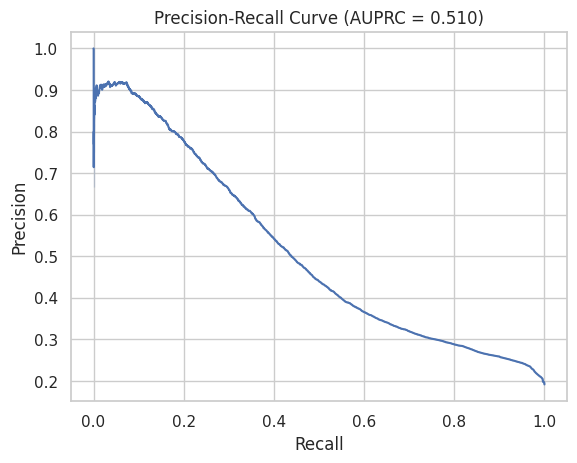

In [4]:
# AUPRC
from sklearn.metrics import precision_recall_curve, average_precision_score
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="whitegrid")

df = df[["response", "Predictions"]]
y_true, y_pred = df["response"], df["Predictions"]

auprc = average_precision_score(y_true, y_pred)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

fig, ax = plt.subplots()

ax.set_title(f"Precision-Recall Curve (AUPRC = {auprc:.3f})")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

sns.lineplot(x=recall, y=precision)

<Axes: title={'center': 'ROC (AUROC = 0.764)'}, xlabel='False positive rate', ylabel='True positive rate'>

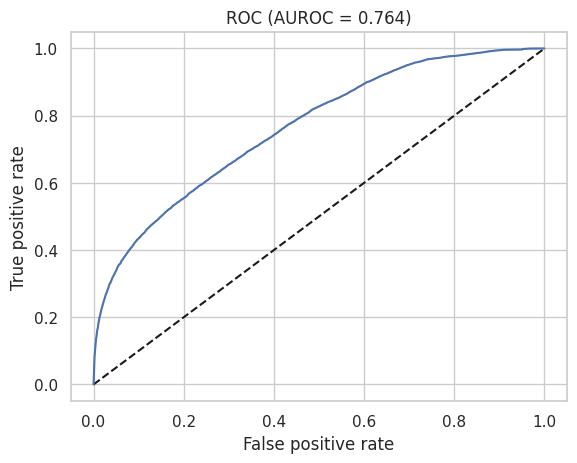

In [5]:
# AUROC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df["response"], df["Predictions"])
auroc = roc_auc_score(y_true, y_pred)

fig, ax = plt.subplots()

ax.set_title(f"ROC (AUROC = {auroc:.3f})")
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")

ax.plot([0, 1], [0, 1], "k--")

sns.lineplot(x=fpr, y=tpr)

In [6]:
# Balanced accuracy
from sklearn.metrics import balanced_accuracy_score

bal_acc = balanced_accuracy_score(y_true, y_pred > 0.5)

print(f"Balanced accuracy: {bal_acc:.3f}")

Balanced accuracy: 0.677


In [7]:
# MCC
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_true, y_pred > 0.5)

print(f"MCC: {mcc:.3f}")

MCC: 0.330
